In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pip install ucimlrepo

In [48]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [49]:
# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

In [50]:
mushroom_df = pd.read_csv(url, header=None, names=column_names)


In [51]:



mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [53]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [54]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in mushroom_df.columns:
    mushroom_df[col] = le.fit_transform(mushroom_df[col])


In [55]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
x = mushroom_df.drop("class", axis=1)
y = mushroom_df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [65]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_values = [1, 50, 100, 150, 200, 250]
accuracy_scores = []

for n_estimators in n_estimators_values:
  # Create Random Forest model
  model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

  # Fit the model
  model.fit(x_train, y_train)

  # Make predictions
  y_pred = model.predict(x_test)

  # Evaluate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

  print(f"Accuracy for n_estimators={n_estimators}: {accuracy}")



Accuracy for n_estimators=1: 1.0
Accuracy for n_estimators=50: 1.0
Accuracy for n_estimators=100: 1.0
Accuracy for n_estimators=150: 1.0
Accuracy for n_estimators=200: 1.0
Accuracy for n_estimators=250: 1.0


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_values = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)
    print(f"Accuracy (n_estimators={n_estimators}): {accuracy:.4f}")


Accuracy (n_estimators=1): 1.0000
Accuracy (n_estimators=50): 1.0000
Accuracy (n_estimators=100): 1.0000
Accuracy (n_estimators=150): 1.0000
Accuracy (n_estimators=200): 1.0000
Accuracy (n_estimators=250): 1.0000


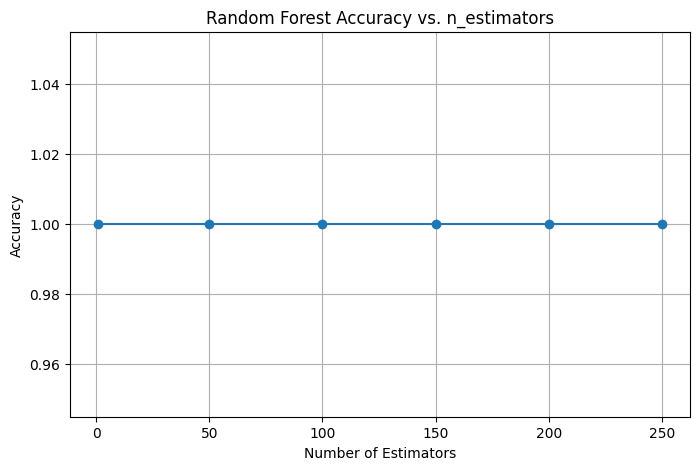

In [58]:
# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, rf_accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. n_estimators")
plt.grid(True)
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(x_test))
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 1.0000


In [63]:
# prompt: Evaluate and compare performance of Random Forest and De0cision Tree.# Compare accuracies
best_rf_accuracy = max(rf_accuracies)
print(f"Random Forest Accuracy: {best_rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")



Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
